#   Machine Learning Group Project
##  Forest Fires
#### Tim Wells, Zidi Okere, Danielle Nario, Grace Kim, Mia Cordoba, Jarvious Jones

In [62]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import statistics as stat
%matplotlib inline
plt.style.use('seaborn-whitegrid')
from sklearn import preprocessing

In [51]:
forest_fires = pd.read_csv('forestfires.csv')
forest_fires

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


Hypothesis: Human activity has a greater influence on the quantity of fires than environmental conditions

Null: Human activity does not have a greater influence on the quantity of fires than environmental conditions


In [52]:
mcount = forest_fires['month'].value_counts()
print(mcount)


aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64


<AxesSubplot:>

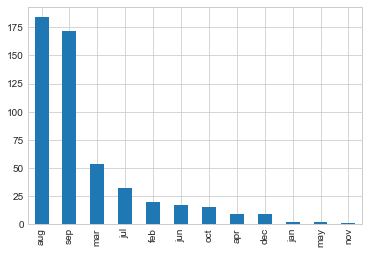

In [53]:
mcount.plot(kind='bar')

The months of August and September are shown to have had the most forest fires. 

Text(0.5, 1.0, 'Fire per Day')

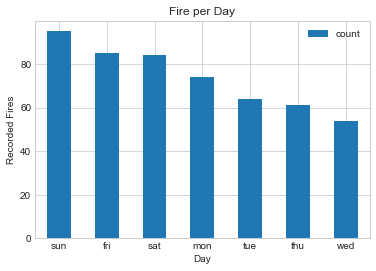

In [54]:
# create new df from count of days in forest fire df
days = forest_fires.value_counts('day').rename_axis('day').reset_index(name='count')

# bar chart with days and fire count
days.plot.bar(x='day', y='count', rot=0)

# chart labels
plt.xlabel('Day')
plt.ylabel('Recorded Fires')
plt.title('Fire per Day')

From our bar graph, we can see that most forest fires have occured on weekend days, mainly Sundays. This could potentially lead to the conclusion that most of those fires were man made.

<function matplotlib.pyplot.show(close=None, block=None)>

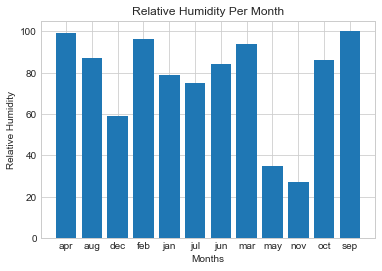

In [55]:
# define x value, the categorical variable of the month
x = forest_fires['month'].sort_values()
y = forest_fires['RH']

# chart labels
plt.xlabel('Months')
plt.ylabel('Relative Humidity')
plt.title('Relative Humidity Per Month')

# create bar graph
plt.bar(x,y)
plt.show

Low humidity takes moisture from the fuels, and fuels in turn, take moisture from the air when the humidity is high. Light fuels, such as grass and pine needles, gain and lose moisture quickly with changes in relative humidity. When RH drops, fire behavior increases because these fine fuels become drier. Relative Humidity appears to be significantly high each month, especially in the months of August and September which were shown to have the most amount of fires. 

<function matplotlib.pyplot.show(close=None, block=None)>

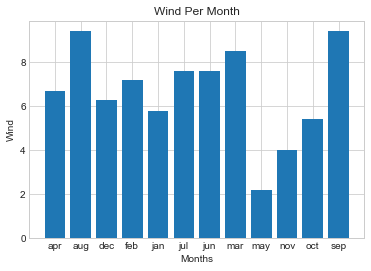

In [56]:
x = forest_fires['month'].sort_values()
y = forest_fires['wind']

plt.xlabel('Months')
plt.ylabel('Wind')
plt.title('Wind Per Month')


plt.bar(x,y)
plt.show

August and September were the months with the highest wind speed which could prove to be a contributing factor of increased forest fires in those months.

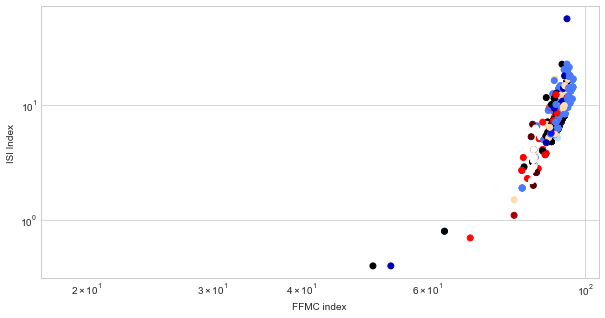

In [57]:
#creating labelEncoder
le = preprocessing.LabelEncoder()
#converting string labels into numbers
#converts the months into numbers
forest_fires.month = le.fit_transform(forest_fires.month)
x = forest_fires.iloc[:, 4:13].values
y = forest_fires.iloc[:, 2].values
plt.figure(figsize=(10,5))
plt.scatter(x[:, 0], x[:, 3], c=y, cmap='flag')
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlabel('FFMC index')
plt.ylabel('ISI Index')
plt.show()
# FFMC represents the moisture content of litter and cured fine fuels.
# It expresses the ease of ignition and fuel flammability. The higher the FFMC
# index, it means the moisture content is low and the forest fuels are dry.
# This means that it is easier for the forest to catch on fire.
# ISI measures the expected rate of a fire spreading. Based on the scatter plot,
# you can generally see that the higher the FFMC index is, the higher the ISI
# index is. We can infer that the dryer the forest is, we expect the fire
# to occur and spread more.

FFMC represents the moisture content of litter and cured fine fuels. It expresses the ease of ignition and fuel flammability. The higher the FFMC index, it means the moisture content is low and the forest fuels are dry. This means that it is easier for the forest to catch on fire. ISI measures the expected rate of a fire spreading. Based on the scatter plot, you can generally see that the higher the FFMC index is, the higher the ISI index is. We can infer that the dryer the forest is, we expect the fire to occur and spread more.

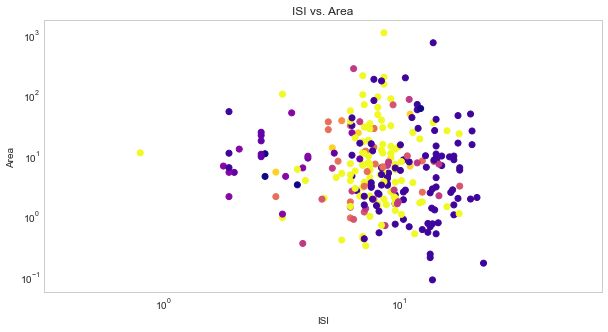

In [58]:
# logarithmic scale plot 
# ISI = Initial Spread Index -> represents the ability of a fire to spread immediately after ignition
m = forest_fires.month
plt.figure(figsize=(10,5))
plt.scatter(forest_fires['ISI'],forest_fires['area'], c=m, cmap='plasma')
plt.grid()
plt.xscale("log")
plt.yscale("log")
plt.title("ISI vs. Area")
plt.xlabel('ISI') 
plt.ylabel('Area')
plt.show()

ISI is the Initial Spread Index, which represents the ability of a fire to spread immediately after ignition. This index is based on wind speed and FFMC. It was shown that there was a significant amount of wind speed throughout most months, specifically September and August. Also, as FFMC increased so does ISI. From the graph, it seems that most fires had very similar ISI's and range of area resulting in a cluster on the scatter plot, give or take a few outliers. ISI doesn't seem to have a significant affect on the area's of forest fires.

In [71]:
forest_fires = pd.read_csv('forestfires.csv')
forest_fires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [72]:
#empty list for DMC for each month
jan_DMC = []
feb_DMC = []
mar_DMC = []
apr_DMC = []
may_DMC = []
jun_DMC = []
jul_DMC = []
aug_DMC = []
sep_DMC = []
oct_DMC = []
nov_DMC = []
dec_DMC = []

In [73]:
#adding DMC value to appropriate list for everytime each month occurs
for n in range(forest_fires.shape[0]):
    if forest_fires.month[n] == 'jan':
        jan_DMC.append(forest_fires.DMC[n])
    elif forest_fires.month[n] == 'feb':
        feb_DMC.append(forest_fires.DMC[n])
    elif forest_fires.month[n] == 'mar':
        mar_DMC.append(forest_fires.DMC[n])
    elif forest_fires.month[n] == 'apr':
        apr_DMC.append(forest_fires.DMC[n])
    elif forest_fires.month[n] == 'may':
        may_DMC.append(forest_fires.DMC[n])
    elif forest_fires.month[n] == 'jun':
        jun_DMC.append(forest_fires.DMC[n])
    elif forest_fires.month[n] == 'jul':
        jul_DMC.append(forest_fires.DMC[n])
    elif forest_fires.month[n] == 'aug':
        aug_DMC.append(forest_fires.DMC[n])
    elif forest_fires.month[n] == 'sep':
        sep_DMC.append(forest_fires.DMC[n])
    elif forest_fires.month[n] == 'oct':
        oct_DMC.append(forest_fires.DMC[n])
    elif forest_fires.month[n] == 'nov':
        nov_DMC.append(forest_fires.DMC[n])
    elif forest_fires.month[n] == 'dec':
        dec_DMC.append(forest_fires.DMC[n])
    else:
        break

In [74]:
#creating a data frame with month and calculated average DMC per month
DMC_avg = pd.DataFrame()

DMC_avg['Month'] = ['Jan', 'Feb', 'Mar',
                    'Apr', 'May', 'Jun',
                    'Jul', 'Aug', 'Sep',
                    'Oct', 'Nov', 'Dec']
DMC_avg['Avg_DMC'] = [stat.mean(jan_DMC), stat.mean(feb_DMC), stat.mean(mar_DMC),
                       stat.mean(apr_DMC), stat.mean(may_DMC), stat.mean(jun_DMC),
                       stat.mean(jul_DMC), stat.mean(aug_DMC), stat.mean(sep_DMC),
                       stat.mean(oct_DMC), stat.mean(nov_DMC), stat.mean(dec_DMC)]
print(DMC_avg)

   Month     Avg_DMC
0    Jan    2.400000
1    Feb    9.475000
2    Mar   34.542593
3    Apr   15.911111
4    May   26.700000
5    Jun   93.382353
6    Jul  110.387500
7    Aug  153.732609
8    Sep  120.922674
9    Oct   41.420000
10   Nov    3.000000
11   Dec   26.122222


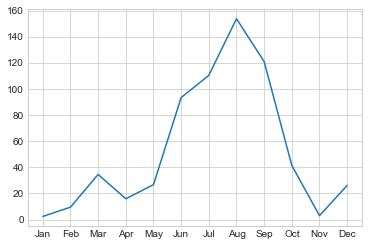

In [75]:
#plot for month vs average DMC
plt.plot(DMC_avg['Month'], DMC_avg['Avg_DMC'], label = 'Average DMC')

plt.show()

In [76]:
#empty list for DC
jan_DC = []
feb_DC = []
mar_DC = []
apr_DC = []
may_DC = []
jun_DC = []
jul_DC = []
aug_DC = []
sep_DC = []
oct_DC = []
nov_DC = []
dec_DC = []

In [77]:
for n in range(forest_fires.shape[0]):
    if forest_fires.month[n] == 'jan':
        jan_DC.append(forest_fires.DC[n])
    elif forest_fires.month[n] == 'feb':
        feb_DC.append(forest_fires.DC[n])
    elif forest_fires.month[n] == 'mar':
        mar_DC.append(forest_fires.DC[n])
    elif forest_fires.month[n] == 'apr':
        apr_DC.append(forest_fires.DC[n])
    elif forest_fires.month[n] == 'may':
        may_DC.append(forest_fires.DC[n])
    elif forest_fires.month[n] == 'jun':
        jun_DC.append(forest_fires.DC[n])
    elif forest_fires.month[n] == 'jul':
        jul_DC.append(forest_fires.DC[n])
    elif forest_fires.month[n] == 'aug':
        aug_DC.append(forest_fires.DC[n])
    elif forest_fires.month[n] == 'sep':
        sep_DC.append(forest_fires.DC[n])
    elif forest_fires.month[n] == 'oct':
        oct_DC.append(forest_fires.DC[n])
    elif forest_fires.month[n] == 'nov':
        nov_DC.append(forest_fires.DC[n])
    elif forest_fires.month[n] == 'dec':
        dec_DC.append(forest_fires.DC[n])
    else:
        break

In [78]:
#displaying data frame for month and average DC
DC_avg = pd.DataFrame()

DC_avg['Month'] = ['Jan', 'Feb', 'Mar',
                    'Apr', 'May', 'Jun',
                    'Jul', 'Aug', 'Sep',
                    'Oct', 'Nov', 'Dec']
DC_avg['Avg_DC'] = [stat.mean(jan_DC), stat.mean(feb_DC), stat.mean(mar_DC),
                    stat.mean(apr_DC), stat.mean(may_DC), stat.mean(jun_DC),
                    stat.mean(jul_DC), stat.mean(aug_DC), stat.mean(sep_DC),
                    stat.mean(oct_DC), stat.mean(nov_DC), stat.mean(dec_DC)]
print(DC_avg)

   Month      Avg_DC
0    Jan   90.350000
1    Feb   54.670000
2    Mar   75.942593
3    Apr   48.555556
4    May   93.750000
5    Jun  297.705882
6    Jul  450.603125
7    Aug  641.077717
8    Sep  734.615698
9    Oct  681.673333
10   Nov  106.700000
11   Dec  351.244444


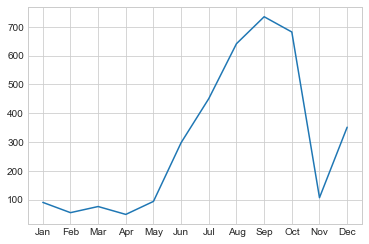

In [79]:
#plot for month vs average DC
plt.plot(DC_avg['Month'], DC_avg['Avg_DC'], label = 'Average DC')

plt.show()

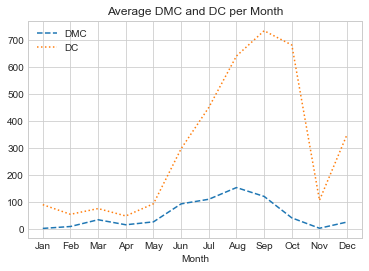

In [81]:
#plot combining month vs average DMC and DC
plt.plot(DMC_avg['Month'], DMC_avg['Avg_DMC'],
         label = 'DMC', linestyle = '--')
plt.plot(DC_avg['Month'], DC_avg['Avg_DC'],
         label = 'DC', linestyle = ':')

plt.xlabel('Month')
plt.title('Average DMC and DC per Month')
plt.legend(loc = 'upper left')

plt.show()